In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [70]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [26]:
print(train_images.shape)
print(train_labels.shape)
print(train_labels[0:10])

(60000, 28, 28)
(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
len(train_labels)

60000

In [30]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [31]:
test_images.shape

(10000, 28, 28)

In [32]:
len(test_labels)

10000

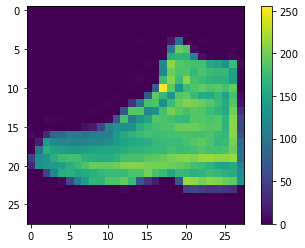

In [33]:
plt.figure()
plt.imshow(train_images[50000])
plt.colorbar()
plt.grid(False)
plt.show()

In [34]:
train_images = train_images / 255.0

test_images = test_images / 255.0

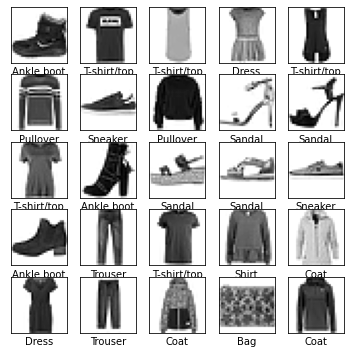

In [35]:
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)

])

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [39]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 982us/step - loss: 0.6304 - accuracy: 0.7791
Epoch 2/10
1875/1875 [==============================] - 2s 954us/step - loss: 0.3790 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 2s 938us/step - loss: 0.3354 - accuracy: 0.8796
Epoch 4/10
1875/1875 [==============================] - 2s 903us/step - loss: 0.3105 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 2s 893us/step - loss: 0.2881 - accuracy: 0.8937
Epoch 6/10
1875/1875 [==============================] - 2s 911us/step - loss: 0.2733 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 2s 917us/step - loss: 0.2656 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.2514 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 2s 946us/step - loss: 0.2411 - accuracy: 0.9098
Epoch 10/10
1875/1875 [==============================] - 2s 934u

In [40]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3436 - accuracy: 0.8785

Test accuracy: 0.8784999847412109


In [41]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [42]:
predictions = probability_model.predict(test_images)

In [43]:
predictions[0]

array([8.81466566e-11, 6.00141342e-14, 8.37595997e-13, 3.84374959e-13,
       2.99984731e-10, 7.04359409e-05, 4.79988105e-10, 6.19473460e-04,
       1.13544235e-11, 9.99310136e-01], dtype=float32)

In [44]:
np.argmax(predictions[0])

9

In [45]:
test_labels[0]

9

In [46]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

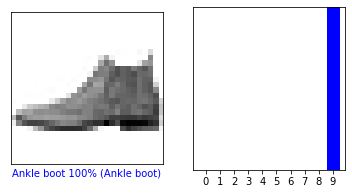

In [47]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

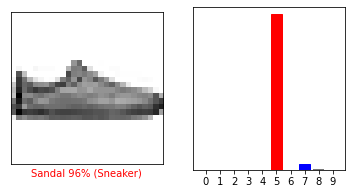

In [48]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

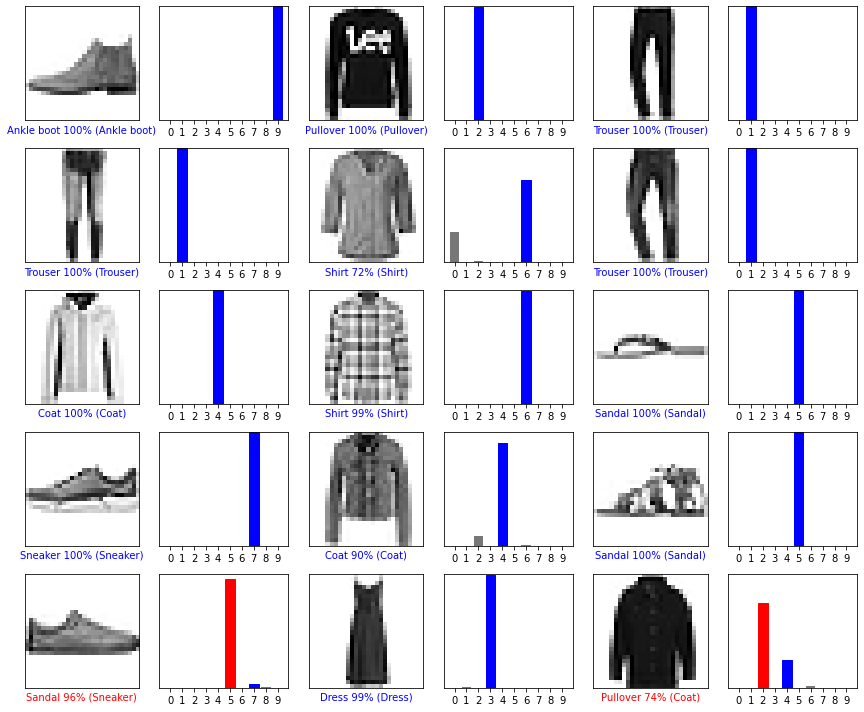

In [49]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [50]:
img = test_images[1]

print(img.shape)

(28, 28)


In [51]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [52]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.7883354e-06 6.1324317e-16 9.9888760e-01 5.7688951e-11 1.0542948e-03
  1.3893970e-11 5.3391079e-05 1.7189608e-12 2.9613614e-10 2.0347904e-15]]


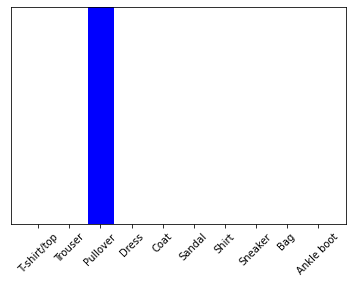

In [53]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [54]:
np.argmax(predictions_single[0])

2

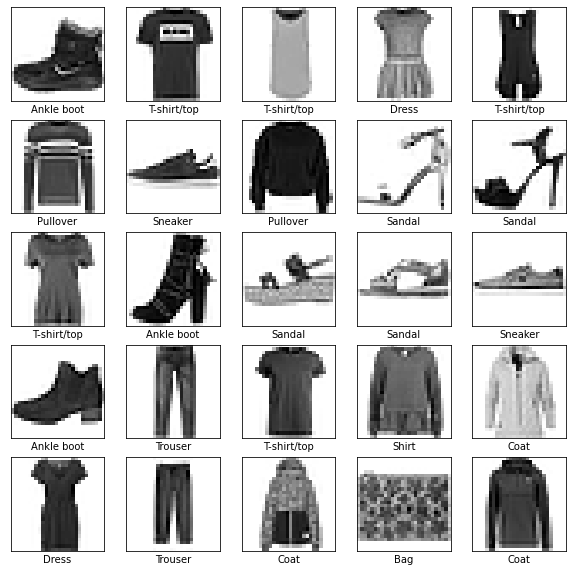

In [55]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [56]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 960us/step - loss: 0.2270 - accuracy: 0.9152
Epoch 2/10
1875/1875 [==============================] - 2s 962us/step - loss: 0.2207 - accuracy: 0.9163
Epoch 3/10
1875/1875 [==============================] - 2s 950us/step - loss: 0.2148 - accuracy: 0.9203
Epoch 4/10
1875/1875 [==============================] - 2s 989us/step - loss: 0.2074 - accuracy: 0.9228
Epoch 5/10
1875/1875 [==============================] - 2s 947us/step - loss: 0.2012 - accuracy: 0.9249
Epoch 6/10
1875/1875 [==============================] - 2s 958us/step - loss: 0.1964 - accuracy: 0.9263
Epoch 7/10
1875/1875 [==============================] - 2s 999us/step - loss: 0.1895 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1855 - accuracy: 0.9305
Epoch 9/10
1875/1875 [==============================] - 2s 955us/step - loss: 0.1799 - accuracy: 0.9326
Epoch 10/10
1875/1875 [==============================] - 2s 972us/

In [57]:
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 2s 975us/step - loss: 0.1719 - accuracy: 0.9353
Epoch 2/2
1875/1875 [==============================] - 2s 953us/step - loss: 0.1692 - accuracy: 0.9359


In [58]:
model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 2s 960us/step - loss: 0.1620 - accuracy: 0.9393
Epoch 2/4
1875/1875 [==============================] - 2s 952us/step - loss: 0.1599 - accuracy: 0.9394
Epoch 3/4
1875/1875 [==============================] - 2s 946us/step - loss: 0.1550 - accuracy: 0.9407
Epoch 4/4
1875/1875 [==============================] - 2s 969us/step - loss: 0.1512 - accuracy: 0.9432


model.fit(train_images, train_labels, epochs=6)

In [59]:
model.fit(train_images, train_labels, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1509 - accuracy: 0.9439
Epoch 2/6
1875/1875 [==============================] - 2s 948us/step - loss: 0.1460 - accuracy: 0.9449
Epoch 3/6
1875/1875 [==============================] - 2s 921us/step - loss: 0.1430 - accuracy: 0.9458
Epoch 4/6
1875/1875 [==============================] - 2s 927us/step - loss: 0.1406 - accuracy: 0.9474
Epoch 5/6
1875/1875 [==============================] - 2s 919us/step - loss: 0.1361 - accuracy: 0.9489
Epoch 6/6
1875/1875 [==============================] - 2s 938us/step - loss: 0.1336 - accuracy: 0.9501


In [60]:
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 2s 994us/step - loss: 0.1327 - accuracy: 0.9506
Epoch 2/8
1875/1875 [==============================] - 2s 964us/step - loss: 0.1290 - accuracy: 0.9518
Epoch 3/8
1875/1875 [==============================] - 2s 987us/step - loss: 0.1281 - accuracy: 0.9513
Epoch 4/8
1875/1875 [==============================] - 2s 955us/step - loss: 0.1221 - accuracy: 0.9546
Epoch 5/8
1875/1875 [==============================] - 2s 921us/step - loss: 0.1198 - accuracy: 0.9553
Epoch 6/8
1875/1875 [==============================] - 2s 915us/step - loss: 0.1183 - accuracy: 0.9560
Epoch 7/8
1875/1875 [==============================] - 2s 913us/step - loss: 0.1177 - accuracy: 0.9563
Epoch 8/8
1875/1875 [==============================] - 2s 950us/step - loss: 0.1145 - accuracy: 0.9569


In [61]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 968us/step - loss: 0.1125 - accuracy: 0.9580
Epoch 2/10
1875/1875 [==============================] - 2s 947us/step - loss: 0.1108 - accuracy: 0.9584
Epoch 3/10
1875/1875 [==============================] - 2s 963us/step - loss: 0.1107 - accuracy: 0.9596
Epoch 4/10
1875/1875 [==============================] - 2s 922us/step - loss: 0.1082 - accuracy: 0.9595
Epoch 5/10
1875/1875 [==============================] - 1s 785us/step - loss: 0.1065 - accuracy: 0.9603
Epoch 6/10
1875/1875 [==============================] - 1s 767us/step - loss: 0.1016 - accuracy: 0.9626
Epoch 7/10
1875/1875 [==============================] - 1s 755us/step - loss: 0.1017 - accuracy: 0.9625
Epoch 8/10
1875/1875 [==============================] - 1s 744us/step - loss: 0.1024 - accuracy: 0.9624
Epoch 9/10
1875/1875 [==============================] - 1s 729us/step - loss: 0.0975 - accuracy: 0.9637
Epoch 10/10
1875/1875 [==============================] - 1s 746u